In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
import seaborn as sns

In [2]:
# Load your original dataset
df = pd.read_csv("/home/malves/predinhib_mtb/data/chemblapi/organism_based_cleaned.csv")

In [3]:
# open the processed_descriptions_final
with open("/home/malves/predinhib_mtb/data/llama/processed_assay_descriptions.pkl", "rb") as f:
    processed_descriptions= pickle.load(f)

In [4]:
# Convert merged_data to a DataFrame

meta_df = pd.DataFrame.from_dict(processed_descriptions, orient='index')
meta_df.index.name = "assay_description"
meta_df.reset_index(inplace=True)


llm_columns = ['mtb_strain', 'mentions_resistance', 'resistant_to', 'mutant', 'mutant_type', 'checkerboard']

meta_df[llm_columns] = meta_df[llm_columns].astype(str)

# # Exact match replacements for mtb_strain
exact_replacements = {
    "H37RV ATCC 27294" : "H37Rv ATCC 27294",
    "H37Rv ATTC 27294": "H37Rv ATCC 27294",
    "H37RV": "H37Rv",
    "ATCC 27294": "H37Rv ATCC 27294",
    "H37Rv ATCC27294": "H37Rv ATCC 27294",
}

# Apply only when the entire string matches
for old_value, new_value in exact_replacements.items():
    meta_df.loc[meta_df['mtb_strain'] == old_value, 'mtb_strain'] = new_value

for col in llm_columns:
    meta_df[col] = meta_df[col].apply(
        lambda x: "True" if str(x).lower() == 'true' else "False" if str(x).lower() == 'false' else x
    )


In [5]:
unique_strains = meta_df['mtb_strain'].unique()
unique_mentions_resistance = meta_df['mentions_resistance'].unique()
unique_resistant_to = meta_df['resistant_to'].unique()
unique_mutant = meta_df['mutant'].unique()
unique_mutant_type = meta_df['mutant_type'].unique()
unique_checkerboard = meta_df['checkerboard'].unique()

In [6]:
meta_df.assay_description.nunique()

3724

In [7]:
# pd.Series(unique_strains).to_csv("/home/malves/predinhib_mtb/data/llama/unique_strains.csv", index=False)

In [8]:
# Merge on 'assay_description'
merged_df = df.merge(meta_df, on="assay_description", how="left")
merged_df

,Unnamed: 0,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,...,units,uo_units,upper_value,value,mtb_strain,mentions_resistance,resistant_to,mutant,mutant_type,checkerboard
0,0,NaN,NaN,34021,[],CHEMBL715914,In vitro antibacterial activity of compound ag...,F,NaN,NaN,...,ug ml-1,UO_0000274,NaN,0.500,H37Rv ATCC 9660,False,False,False,False,False
1,1,NaN,NaN,34115,[],CHEMBL715914,In vitro antibacterial activity of compound ag...,F,NaN,NaN,...,ug ml-1,UO_0000274,NaN,1.000,H37Rv ATCC 9660,False,False,False,False,False
2,2,NaN,NaN,36502,[],CHEMBL715914,In vitro antibacterial activity of compound ag...,F,NaN,NaN,...,ug ml-1,UO_0000274,NaN,0.125,H37Rv ATCC 9660,False,False,False,False,False
3,3,NaN,NaN,42561,[],CHEMBL715914,In vitro antibacterial activity of compound ag...,F,NaN,NaN,...,ug ml-1,UO_0000274,NaN,0.125,H37Rv ATCC 9660,False,False,False,False,False
4,4,NaN,NaN,44868,[],CHEMBL715914,In vitro antibacterial activity of compound ag...,F,NaN,NaN,...,ug ml-1,UO_0000274,NaN,2.000,H37Rv ATCC 9660,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35037,54,NaN,NaN,15777196,[],CHEMBL3637834,GSK_TB: Minimum inhibitory concentration again...,F,NaN,NaN,...,uM,UO_0000065,NaN,5.000,clinical isolates,R,isoniazid and rifampicin,False,False,False
35038,55,NaN,NaN,15777197,[],CHEMBL3637834,GSK_TB: Minimum inhibitory concentration again...,F,NaN,NaN,...,uM,UO_0000065,NaN,1.300,clinical isolates,R,isoniazid and rifampicin,False,False,False
35039,56,NaN,NaN,15777198,[],CHEMBL3637834,GSK_TB: Minimum inhibitory concentration again...,F,NaN,NaN,...,uM,UO_0000065,NaN,0.900,clinical isolates,R,isoniazid and rifampicin,False,False,False
35040,57,NaN,NaN,15777199,[],CHEMBL3637834,GSK_TB: Minimum inhibitory concentration again...,F,NaN,NaN,...,uM,UO_0000065,NaN,1.300,clinical isolates,R,isoniazid and rifampicin,False,False,False


In [9]:
unmatched = merged_df[~merged_df['assay_description'].isin(meta_df['assay_description'])]
display(unmatched['assay_description'].unique())

array([], dtype=object)

In [10]:
for col in llm_columns:
    print(f"Number of Na values in {col}: {meta_df[col].isna().sum()}")

Number of Na values in mtb_strain: 0
Number of Na values in mentions_resistance: 0
Number of Na values in resistant_to: 0
Number of Na values in mutant: 0
Number of Na values in mutant_type: 0
Number of Na values in checkerboard: 0


In [11]:
merged_df.mtb_strain.isna().sum()

np.int64(0)

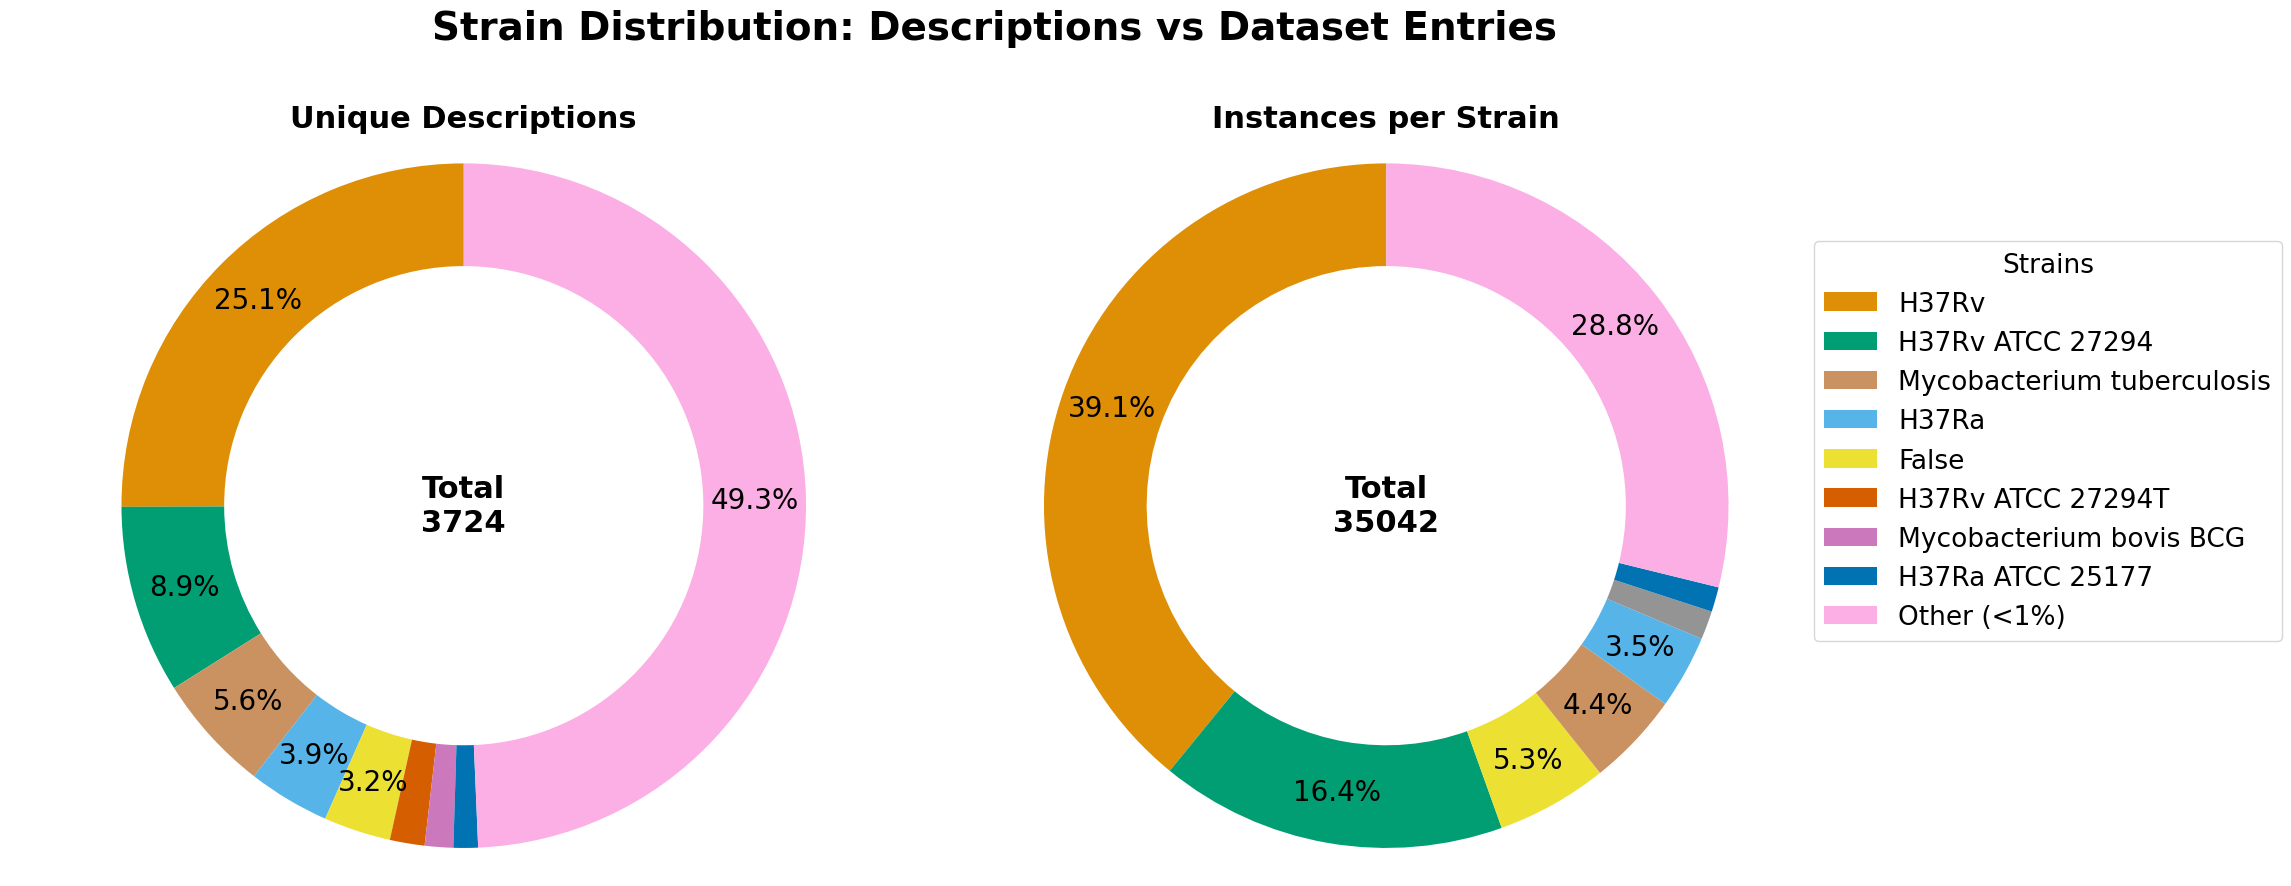

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume meta_df and merged_df exist
percentages_original = meta_df["mtb_strain"].value_counts(normalize=True) * 100
percentages_merged = merged_df["mtb_strain"].value_counts(normalize=True) * 100

total_count_original = meta_df["mtb_strain"].notna().sum()
total_count_merged = merged_df["mtb_strain"].notna().sum()

threshold = 1

def prepare_data(percentages, threshold):
    filtered = percentages[percentages >= threshold]
    others = percentages[percentages < threshold].sum()
    plot_data = filtered.copy()
    plot_data["Other (<1%)"] = others
    return plot_data

plot_data_original = prepare_data(percentages_original, threshold)
plot_data_merged = prepare_data(percentages_merged, threshold)

# Collect all unique labels
unique_labels = set(str(label) for label in plot_data_original.index).union(
                str(label) for label in plot_data_merged.index)

base_palette = sns.color_palette("colorblind", n_colors=len(unique_labels))
rotation_offset = 7
palette = base_palette[rotation_offset:] + base_palette[:rotation_offset]
label_to_color = dict(zip(sorted(unique_labels), palette))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 9))

def plot_donut(ax, plot_data, total_count, title):
    explode = [0.05 if val < 5 else 0 for val in plot_data.values]
    wedges, texts, autotexts = ax.pie(
        plot_data,
        labels=None,
        autopct=lambda pct: f"{pct:.1f}%" if pct > 2 else "",
        startangle=90,
        wedgeprops={'width': 0.3},
        colors=[label_to_color[str(label)] for label in plot_data.index],
        pctdistance=0.85)
    
    ax.text(0, 0, f'Total\n{total_count}', ha='center', va='center',
            fontsize=22, weight='bold')
    ax.set_title(title, fontsize=22, weight='bold')
    ax.axis('equal')
    for autotext in autotexts:
        autotext.set_fontsize(20) 
    return wedges

# Draw the charts
wedges_original = plot_donut(axes[0], plot_data_original, total_count_original, "Unique Descriptions")
wedges_merged = plot_donut(axes[1], plot_data_merged, total_count_merged, "Instances per Strain")

# Add legend to the right
fig.legend(wedges_original,
           plot_data_original.index,
           title="Strains",
           loc="center right",
           bbox_to_anchor=(1.15, 0.5),
           fontsize=19,
           title_fontsize=19)

# Main title
fig.suptitle("Strain Distribution: Descriptions vs Dataset Entries", fontsize=28, weight='bold', y=0.98, ha='center')

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.93, 0.95])  # allow room for legend
plt.savefig("/home/malves/predinhib_mtb/figures/strain_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


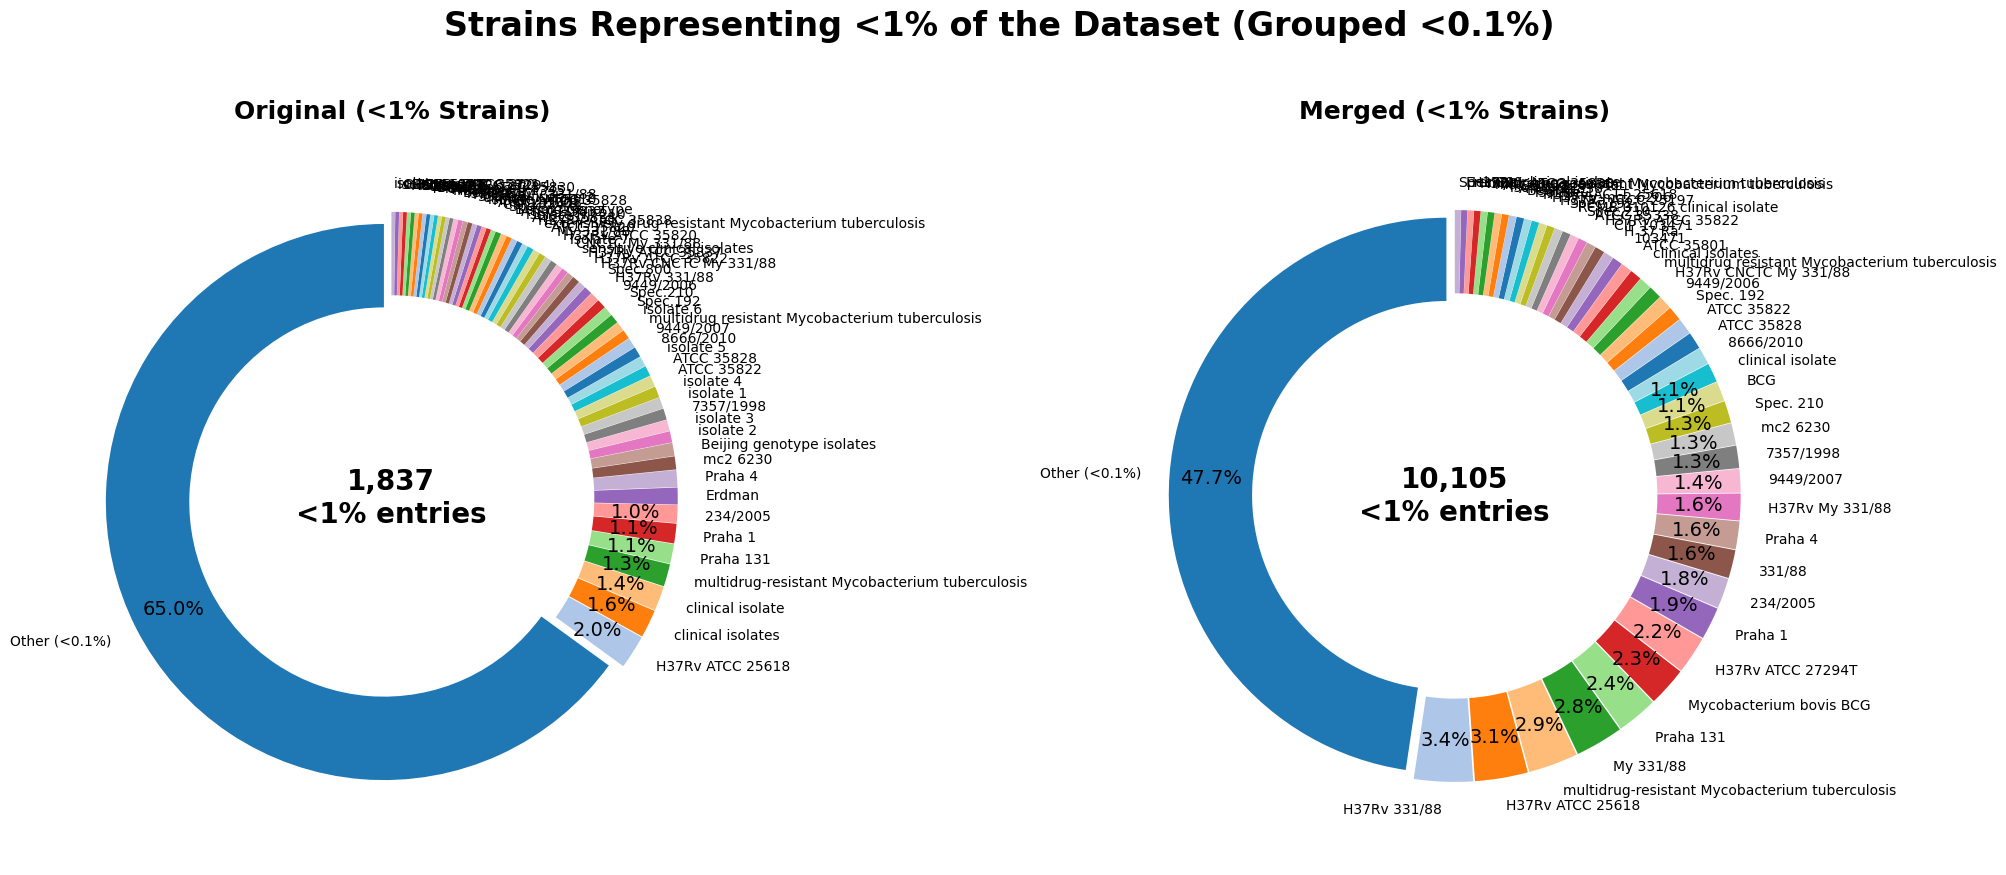

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate strain percentages
percentages_original = meta_df["mtb_strain"].value_counts(normalize=True) * 100
percentages_merged = merged_df["mtb_strain"].value_counts(normalize=True) * 100

# Total entries per strain (for getting real counts later)
counts_original = meta_df["mtb_strain"].value_counts()
counts_merged = merged_df["mtb_strain"].value_counts()

# Filter strain names <1%
threshold_outer = 1
strains_original_under_1 = percentages_original[percentages_original < threshold_outer].index
strains_merged_under_1 = percentages_merged[percentages_merged < threshold_outer].index

# Get percentages for plotting
filtered_original = percentages_original.loc[strains_original_under_1]
filtered_merged = percentages_merged.loc[strains_merged_under_1]

# Get actual count of entries <1%
count_under_1_original = counts_original.loc[strains_original_under_1].sum()
count_under_1_merged = counts_merged.loc[strains_merged_under_1].sum()

# Plot setup
fig, axes = plt.subplots(1, 2, figsize=(20, 9))

def group_and_plot_strains(ax, data, title, inner_threshold=0.1, subset_count=None):
    # Group small slices under "Other (<0.1%)"
    grouped = data[data >= inner_threshold]
    other_sum = data[data < inner_threshold].sum()

    if other_sum > 0:
        grouped["Other (<0.1%)"] = other_sum

    grouped = grouped.sort_values(ascending=False)
    palette = sns.color_palette("tab20", n_colors=len(grouped))
    explode = [0.03] * len(grouped)

    wedges, texts, autotexts = ax.pie(
        grouped,
        labels=grouped.index,
        autopct=lambda pct: f"{pct:.1f}%" if pct > 1 else "",
        startangle=90,
        wedgeprops={'width': 0.3},
        colors=palette,
        pctdistance=0.85,
        explode=explode
    )

    # Show real count of <1% entries in center
    if subset_count is not None:
        ax.text(0, 0, f'{subset_count:,}\n<1% entries', ha='center', va='center',
                fontsize=20, weight='bold')

    ax.set_title(title, fontsize=18, weight='bold')
    ax.axis('equal')
    for autotext in autotexts:
        autotext.set_fontsize(14)

# Draw both plots
group_and_plot_strains(axes[0], filtered_original, "Original (<1% Strains)", inner_threshold=0.1, subset_count=count_under_1_original)
group_and_plot_strains(axes[1], filtered_merged, "Merged (<1% Strains)", inner_threshold=0.1, subset_count=count_under_1_merged)

# Main title and layout
fig.suptitle("Strains Representing <1% of the Dataset (Grouped <0.1%)", fontsize=24, weight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("/home/malves/predinhib_mtb/figures/strain_distribution_less_than_1_percent_grouped.png", dpi=300, bbox_inches='tight')
plt.show()


In [13]:
num_smiles_with_duplicates = merged_df["canonical_smiles"]\
    .value_counts()\
    .loc[lambda x: x > 1]\
    .count()
    
num_smiles_with_duplicates

np.int64(5395)

In [14]:
h37rv = merged_df[merged_df["mtb_strain"].isin(["H37Rv", "H37Rv ATCC 27294", "H37Rv ATCC 27294T"])]

In [15]:
#from the unique smiles get the number of duplicates
num_smiles_with_duplicates_h37rv = h37rv["canonical_smiles"]\
    .value_counts()\
    .loc[lambda x: x > 1]\
    .count()
    
num_smiles_with_duplicates_h37rv

np.int64(2196)

In [16]:
# 1. Get unique SMILES in H37Rv strain subset
unique_smiles_h37rv = h37rv["canonical_smiles"].unique()

# 2. Count occurrences of each SMILES in the full dataset
smiles_counts_full = merged_df["canonical_smiles"].value_counts()

# 3. Check how many of the H37Rv-unique SMILES have count > 1 globally
num_h37rv_smiles_with_duplicates_globally = sum(
    smiles_counts_full[unique_smiles_h37rv] > 1
)

print(f"H37Rv unique SMILES with duplicates in full dataset: {num_h37rv_smiles_with_duplicates_globally}")

H37Rv unique SMILES with duplicates in full dataset: 4020


In [17]:
# Get the percentage of rows that resistant_to column has the value False
percentage_resistant_to_false = h37rv[h37rv["resistant_to"] == "False"].shape[0] / h37rv.shape[0] * 100
percentage_resistant_to_false

97.9197395859824

In [18]:
#number of unique canonical_smiles
merged_df["canonical_smiles"].nunique(), h37rv["canonical_smiles"].nunique(), h37rv["canonical_smiles"].nunique() / merged_df["canonical_smiles"].nunique() * 100

(18793, 14530, 77.31602192305645)

In [ ]:
# merged_df.to_csv("/home/malves/predinhib_mtb/data/organism_w_llama.csv", index=False)